In [93]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [94]:
#Read in data
path='C:/Users/mariak/Documents/limited-data.npy'
path='C:/Users/mariak/Documents/three-years (1).npy'
data=np.load(path)
print(data.shape)
print(data)

(1091, 24, 4)
[[[3.000e+00 5.220e+01 4.000e+00 2.010e+02]
  [6.100e+00 5.250e+01 2.400e+00 1.760e+02]
  [5.300e+00 5.340e+01 2.100e+00 1.650e+02]
  ...
  [6.600e+00 6.220e+01 3.300e+00 1.400e+02]
  [4.200e+00 6.300e+01 3.500e+00 1.860e+02]
  [2.800e+00 6.370e+01 3.600e+00 2.000e+02]]

 [[4.500e+00 6.400e+01 3.600e+00 1.820e+02]
  [5.400e+00 6.280e+01 1.600e+00 1.470e+02]
  [5.300e+00 6.190e+01 1.500e+00 1.420e+02]
  ...
  [2.300e+00 6.150e+01 4.900e+00 1.980e+02]
  [3.200e+00 6.120e+01 4.600e+00 2.100e+02]
  [3.900e+00 6.030e+01 4.300e+00 2.140e+02]]

 [[3.700e+00 5.970e+01 4.600e+00 2.260e+02]
  [3.800e+00 5.990e+01 3.000e+00 2.480e+02]
  [6.000e+00 6.010e+01 3.200e+00 2.450e+02]
  ...
  [1.720e+01 5.500e+01 1.600e+00 2.140e+02]
  [9.500e+00 5.630e+01 2.300e+00 3.010e+02]
  [5.900e+00 5.580e+01 2.300e+00 2.890e+02]]

 ...

 [[4.540e+01 5.090e+01 4.000e-01 5.150e+01]
  [3.960e+01 4.920e+01 1.000e+00 3.522e+02]
  [3.960e+01 4.880e+01 8.000e-01 3.553e+02]
  ...
  [4.030e+01 6.350e+01 1.1

In [95]:
#In some MinMax cases might reduce correlation 
#StandardScaler gives gibberish results

def standardize_data(data):
    scaler=MinMaxScaler()
    #scaler=StandardScaler()
    nr_of_days=data.shape[0]
    nr_of_hours=data.shape[1]
    scaler.fit(data.reshape(nr_of_days*nr_of_hours,4))
    sc_data=scaler.transform(data.reshape(nr_of_days*nr_of_hours,4)).reshape(nr_of_days,nr_of_hours,4)
    return sc_data

data=standardize_data(data)

In [96]:
def generate_labels(data):
    labels=np.roll(data,-1,axis=1)
    print(data[0])
    print(labels[0])
    for day in range(0,data.shape[0]):
        labels[day,23,:]=np.zeros((1,1,4))
    return labels
y=generate_labels(data)
print(data[0])
print(y[0])

[[0.04761905 0.39232409 0.0982801  0.55833333]
 [0.0968254  0.39552239 0.05896806 0.48888889]
 [0.08412698 0.40511727 0.05159705 0.45833333]
 [0.06349206 0.42110874 0.04668305 0.48055556]
 [0.04603175 0.42643923 0.02948403 0.32777778]
 [0.06984127 0.42857143 0.04176904 0.33055556]
 [0.05238095 0.42643923 0.05159705 0.35833333]
 [0.08888889 0.43603412 0.06142506 0.39722222]
 [0.08412698 0.45522388 0.08599509 0.41944444]
 [0.0952381  0.46481876 0.10565111 0.44444444]
 [0.10952381 0.47654584 0.10565111 0.45      ]
 [0.07301587 0.47867804 0.1007371  0.47222222]
 [0.07777778 0.46908316 0.06879607 0.47222222]
 [0.14285714 0.46481876 0.05405405 0.3       ]
 [0.1031746  0.46908316 0.1007371  0.4       ]
 [0.1        0.48187633 0.06388206 0.38333333]
 [0.12380952 0.48187633 0.07125307 0.43333333]
 [0.1        0.48827292 0.06633907 0.45555556]
 [0.11269841 0.49147122 0.09090909 0.50833333]
 [0.13968254 0.49573561 0.05651106 0.45833333]
 [0.14444444 0.4978678  0.04422604 0.32222222]
 [0.1047619  

In [97]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
%matplotlib inline
def lstm_model(X_train,y_train,X_test,y_test):
    '''
    Train model.
    '''
    filters=28
    kernel_size=3
    stop_here_please = EarlyStopping(patience=3)
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=X_train.shape[1:]))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(128,return_sequences=True))    
    model.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 activation='relu',
                 strides=1))
    model.add(Dropout(0.5))
    #model.add(LSTM(128,return_sequences=True))
    #model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
    history=model.fit(X_train, y_train, epochs=500, validation_split=0.1,batch_size=16, shuffle=True,callbacks=[stop_here_please])
    return model, history
    
X_train=data[100:,:,:]
y_train=y[100:,:,:]
X_test=data[:100,:,:]
y_test=data[:100,:,:]

model, history=lstm_model(X_train,y_train,0,0)



Train on 891 samples, validate on 100 samples
Epoch 1/500
891/891 [==============================] - 16s 18ms/step - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0586 - val_mean_squared_error: 0.0586
Epoch 2/500
891/891 [==============================] - 13s 14ms/step - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 3/500
891/891 [==============================] - 13s 14ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 4/500
891/891 [==============================] - 13s 14ms/step - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 5/500
891/891 [==============================] - 13s 14ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 6/500
891/891 [==============================] - 13s 14ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.02

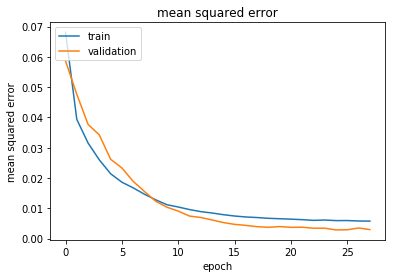

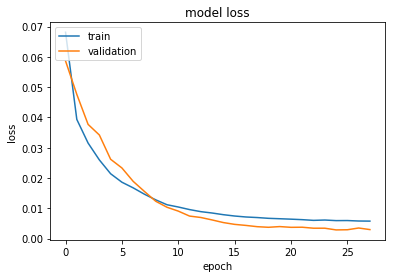

In [98]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean squared error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [106]:
#Predict
X_=X_test[20,:,:].reshape(1,24,4)
X=X_test
yhat = model.predict(X)
#print(yhat)

def predict_for_n_timesteps(model,n_timesteps,X):
    '''
    Given a seed value of 24 previous hours, the
    function outputs a prediction of then next
    n_timesteps by recursively applying the model.
    '''
    yhat=X
    for j in range(0,n_timesteps):
        yhat=model.predict(yhat)
    return yhat[0,24-n_timesteps:,:]

pred_4=predict_for_n_timesteps(model,6,X_)
print(pred_4)
#print(X)

[[0.20297465 0.4503684  0.01402596 0.18236485]
 [0.19196433 0.46490613 0.01598525 0.12918639]
 [0.18116908 0.46792015 0.01859192 0.11343637]
 [0.161665   0.4436379  0.01973013 0.08821651]
 [0.12012085 0.35034993 0.0198507  0.05636922]
 [0.         0.         0.         0.        ]]


In [109]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


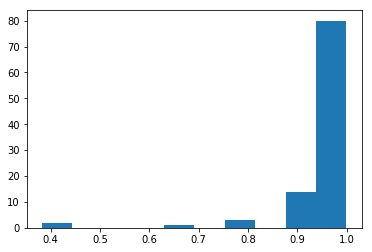

0.9555956883489027
(95,)


In [108]:
from scipy.stats.stats import pearsonr
no2_pred_lst=[]
no2_true_lst=[]
for j in range(0,100):
    no2_pred=yhat[j,:,0].reshape(1,24)[0,:-1]
    no2_pred_lst.append(no2_pred)
    no2_true=X[j,:,0].reshape(1,24)[0,1:]
    no2_true_lst.append(no2_true)
corr_lst=[]
for j in range(0,100):
    corr_lst.append(np.corrcoef(no2_pred_lst[j],no2_true_lst[j])[0,1])
#print(corr_lst)
plt.hist(corr_lst)
plt.show()
print(np.mean(corr_lst))
corr_lst=np.array(corr_lst)
print(corr_lst[corr_lst>0.80].shape)